# Airline EDA Analysis Portfolio

In this project we will analyze data from an airline company to understand how airline prices change based on different factors. Dataset includes following columns:

- `miles`: miles traveled through the flight
- `passengers`: number of passengers on the flight
- `delay`: take-off delay in minutes
- `inflight_meal`: is there a meal included in the flight?
- `inflight_entertainment`: are there free entertainment systems for each seat?
- `inflight_wifi`: is there complimentary wifi on the flight?
- `day_of_week`: day of the week of the flight
- `weekend`: did this flight take place on a weekend?
- `coach_price`: the average price paid for a coach ticket
- `firstclass_price`: the average price paid for first-class seats
- `hours`: how many hours the flight took
- `redeye`: was this flight a redeye (overnight)?

In [165]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

Quick look at the dataset.

In [166]:
df = pd.read_csv('flight.csv')
df.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


Let's get some technical informations about this dataset.

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129780 entries, 0 to 129779
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   miles                   129780 non-null  int64  
 1   passengers              129780 non-null  int64  
 2   delay                   129780 non-null  int64  
 3   inflight_meal           129780 non-null  object 
 4   inflight_entertainment  129780 non-null  object 
 5   inflight_wifi           129780 non-null  object 
 6   day_of_week             129780 non-null  object 
 7   redeye                  129780 non-null  object 
 8   weekend                 129780 non-null  object 
 9   coach_price             129780 non-null  float64
 10  firstclass_price        129780 non-null  float64
 11  hours                   129780 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 11.9+ MB


At first glance everything looks fine. There are no missing values and columns have types corresponding to data they store.

Let's quickly deal with any duplicates and if there are any remove them.

In [168]:
df.drop_duplicates(inplace=True)

Next thing is to see descriptive statistics of variables.

In [169]:
df.describe()

,miles,passengers,delay,coach_price,firstclass_price,hours
count,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000,129780.000000
mean,2006.224696,207.723155,13.162845,376.585253,1454.931785,3.631214
std,943.034768,12.776363,41.941680,67.744274,162.590434,1.739118
min,12.000000,135.000000,0.000000,44.415000,939.100000,1.000000
25%,1343.000000,204.000000,9.000000,331.445000,1302.200000,2.000000
50%,1986.000000,210.000000,10.000000,380.560000,1503.840000,4.000000
75%,2468.000000,215.000000,13.000000,426.676250,1582.370000,4.000000
max,4548.000000,244.000000,1560.000000,593.635000,1846.780000,8.000000


Something what should brought attention is Delay column. Maximum value in this column is 1560 what means over day of delay!. Let's inspect flight delayed more than hour.

In [170]:
df[df.delay > 60].shape[0]

100

In [171]:
df[df.delay > 60].head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
129680,2722,198,1515,No,Yes,Yes,Wednesday,No,No,286.300,1374.06,5
129681,1500,215,1484,Yes,No,Yes,Monday,No,No,254.520,1240.24,3
129682,2236,189,1498,No,Yes,Yes,Wednesday,No,No,395.230,1280.46,4
129683,2105,222,1519,No,Yes,Yes,Sunday,No,Yes,468.945,1567.65,4
129684,933,205,1446,Yes,Yes,Yes,Tuesday,No,No,298.955,1196.84,2


There are 100 flights delayed more than hour. How does the distribution od these delay time look like?

Text(0.5, 1.0, 'Histogram for delay longer than hour')

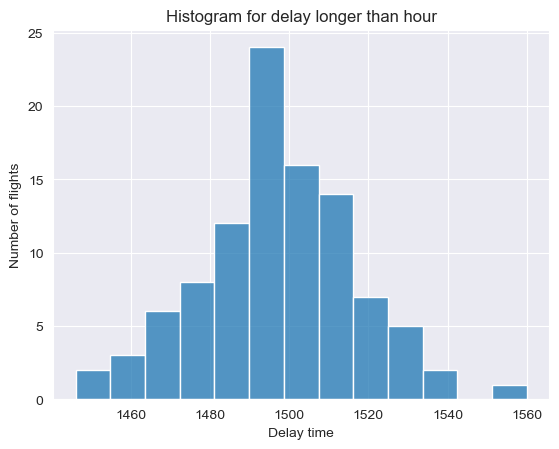

In [172]:
sns.histplot(data = df[df.delay > 60], x='delay')
plt.xlabel("Delay time")
plt.ylabel("Number of flights")
plt.title("Histogram for delay longer than hour")

As you can see there is a huge gap between flight delayed upto one hour and the rest. Most common 'long time delay' is slightly smaller that 1500 minutes - that's 25 hours ! Let's remind that our dataset consists of 129 780 observations. Our huge delays represent very small part of entire set so they won't affect much.

To describe categorical variables we will count percentage share of each unique value in all columns.

In [173]:
categorical_colnames = ['inflight_meal', 'inflight_entertainment', 'inflight_wifi', 'day_of_week', 'redeye', 'weekend', 'hours']
for column in categorical_colnames:
    display(df[column].value_counts(normalize=True))

No     0.699746
Yes    0.300254
Name: inflight_meal, dtype: float64

Yes    0.801572
No     0.198428
Name: inflight_entertainment, dtype: float64

Yes    0.899723
No     0.100277
Name: inflight_wifi, dtype: float64

Saturday     0.259948
Sunday       0.218046
Friday       0.174210
Monday       0.108376
Tuesday      0.087772
Wednesday    0.086462
Thursday     0.065187
Name: day_of_week, dtype: float64

No     0.950331
Yes    0.049669
Name: redeye, dtype: float64

Yes    0.652204
No     0.347796
Name: weekend, dtype: float64

4    0.286654
3    0.209585
1    0.133888
5    0.126583
2    0.122954
7    0.080529
8    0.020296
6    0.019510
Name: hours, dtype: float64

We can say that this airline have modern and well-equiped planes. Near 70% of flight had inflight meal, 80% offers entertainment and 90% had wifi. Also airline offers more flight on Friday, Saturday and Sunday that the rest of week. Pilots like to flight during the day - only 5% of flights took place at night and prefer short flight rather than long ones. 

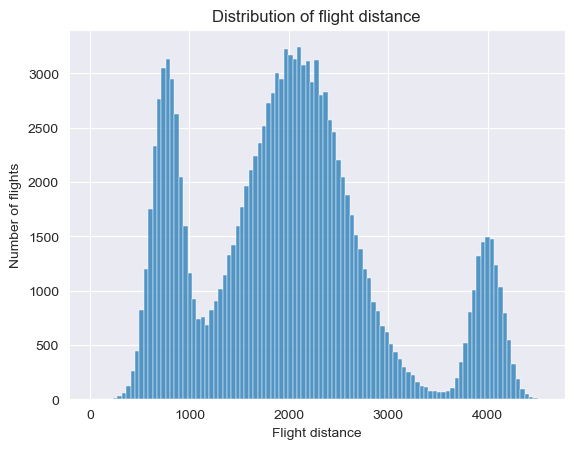

In [174]:
sns.histplot(df.miles)
plt.ylabel("Number of flights")
plt.xlabel("Flight distance")
plt.title("Distribution of flight distance")
plt.show()

Distribution of flight distance is multimodal what means that planes are usually flying to destinations distant from airport by around 700 miles, 2000 miles or 4000 miles. 

What about the number of passengers? 

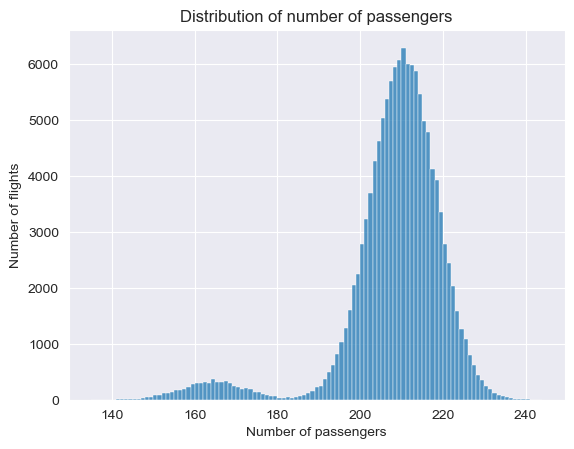

In [175]:
sns.histplot(df.passengers, binwidth=1)
plt.xlabel("Number of passengers")
plt.ylabel("Number of flights")
plt.title("Distribution of number of passengers")
plt.show()

By looking at the plot we might observe that majority of planes took about 210 passengers. The small hill between 140 and 180 passengers might suggest for example that airline have a few smaller planes taking around 170 passengers.

Next let's move on to delay column. Before we said that only very small part of all flight was delayed more that one hour so in this analysis we will ignore them. Let's look at the flight with "normal" delay time.

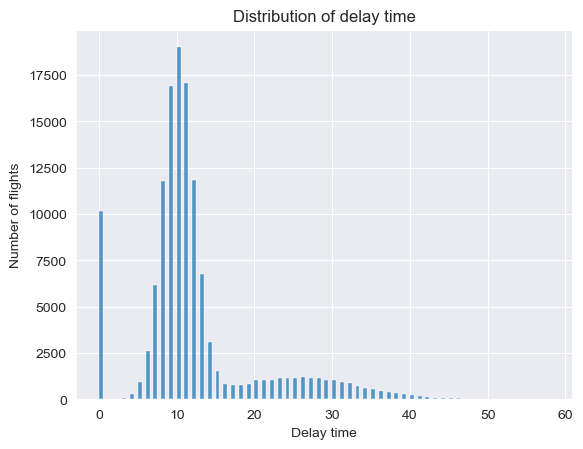

In [176]:
sns.histplot(df[df.delay < 60].delay, binwidth=.5)
plt.xlabel("Delay time")
plt.ylabel("Number of flights")
plt.title("Distribution of delay time")
plt.show()

Around 10000 flights weren't delayed at all but if there was a delay usually was around 10 minutes.

Let's take a look at coach price now.

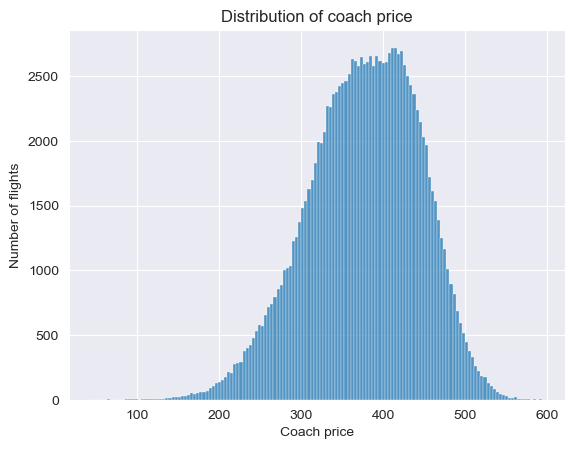

In [177]:
sns.histplot(df.coach_price)
plt.xlabel("Coach price")
plt.ylabel("Number of flights")
plt.title("Distribution of coach price")
plt.show()

This plot looks very typical. It's unimodal that means that average price of coach size is around 400 dollars.

Now it's time for firstclass price.

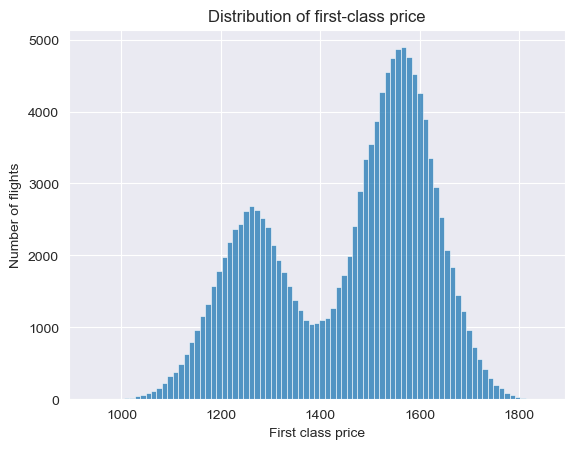

In [178]:
sns.histplot(df.firstclass_price)
plt.xlabel("First class price")
plt.ylabel("Number of flights")
plt.title("Distribution of first-class price")
plt.show()

In the opposite to previous histogram this one is bimodal what's interesting. Prices of most first class tickets are concentrating around 1300 dollars and 1600 dollars. 

We have already told something about flight time but here's the graph to see this trend better.

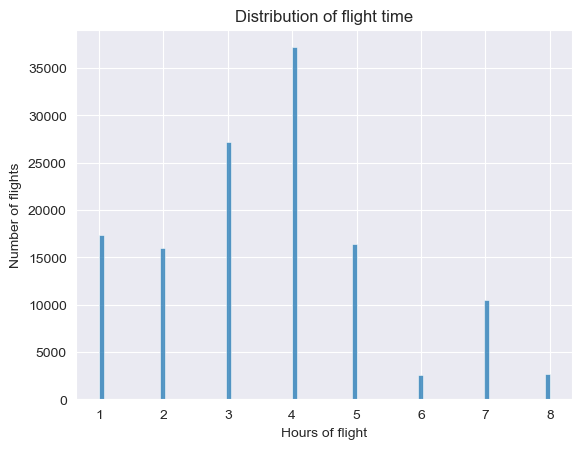

In [179]:
sns.histplot(df.hours)
plt.xlabel("Hours of flight")
plt.ylabel("Number of flights")
plt.title("Distribution of flight time")
plt.show()

As previous, categorical variables have been already analyzed and here are the plots.

<Figure size 8000x8000 with 0 Axes>

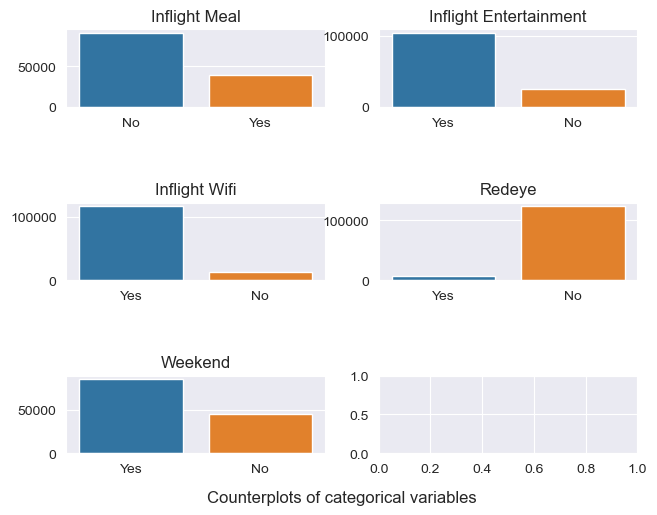

In [180]:
plt.figure(figsize=(80, 80))
fig, ax =plt.subplots(3,2)
fig.tight_layout(h_pad=5)
fig.suptitle('Counterplots of categorical variables', y= 0)
sns.countplot(df, x='inflight_meal', ax=ax[0,0])
ax[0, 0].set_title('Inflight Meal')
ax[0,0].set_xlabel("")
ax[0,0].set_ylabel("")
sns.countplot(df, x ='inflight_entertainment', ax=ax[0,1])
ax[0, 1].set_title('Inflight Entertainment')
ax[0,1].set_xlabel("")
ax[0,1].set_ylabel("")
sns.countplot(df, x = 'inflight_wifi', ax=ax[1,0])
ax[1, 0].set_title('Inflight Wifi')
ax[1,0].set_xlabel("")
ax[1,0].set_ylabel("")
sns.countplot(df, x = 'redeye',  ax=ax[1,1])
ax[1, 1].set_title('Redeye')
ax[1,1].set_xlabel("")
ax[1,1].set_ylabel("")
sns.countplot(df, x = 'weekend', ax=ax[2,0])
ax[2, 0].set_title('Weekend')
ax[2,0].set_xlabel("")
ax[2,0].set_ylabel("")
plt.show()

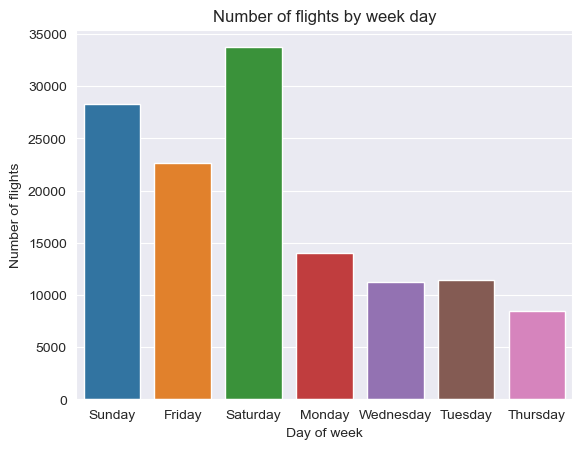

In [181]:
sns.countplot(df, x = 'day_of_week')
plt.xlabel("Day of week")
plt.ylabel("Number of flights")
plt.title("Number of flights by week day")
plt.show()

Let's compare number of passengers on week days and weekends.

Text(0.5, 1.0, 'Distribution of passengers number based on week part')

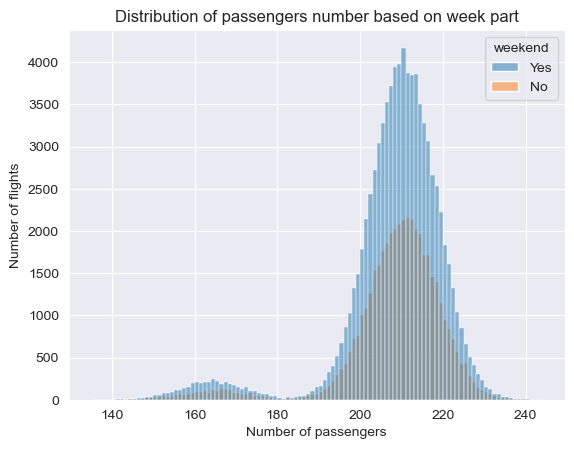

In [182]:
sns.histplot(df, x = 'passengers', hue = 'weekend', binwidth=1)
plt.xlabel("Number of passengers")
plt.ylabel("Number of flights")
plt.title("Distribution of passengers number based on week part")

We expected this result thanks to previous analysis. Also it's common that more people are travelling on weekends.

How does the coach price change based on day of week. This violin plot will help us to understand this.

Text(0.5, 1.0, 'Violin plots of coach price on different days of week')

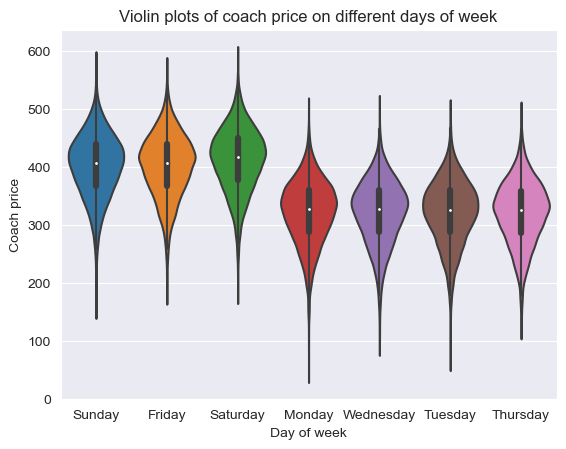

In [183]:
sns.violinplot(df, y = 'coach_price', x = 'day_of_week')
plt.xlabel("Day of week")
plt.ylabel("Coach price")
plt.title("Violin plots of coach price on different days of week")

It's nothing new - coach prices are higher on weekends. If your planning to flight then keep in mind that on Saturday and Sunday prices are varying more then on Friday. On the other hand if you select a week day best prices should be on Monday.

Is there any relationship between day or night flight and whether is on weekend or not? One of the statistical test will be helpful here. First we need to get the number of flights in each of these 4 categories. 

In [184]:
n_redeye_weekend = df[(df.redeye == "Yes") & (df.weekend == "Yes")].shape[0]
n_nredeye_weekend = df[(df.redeye == "No") & (df.weekend == "Yes")].shape[0]
n_nredeye_nweekend = df[(df.redeye == "No") & (df.weekend == "No")].shape[0]
n_redeye_nweekend = df[(df.redeye == "Yes") & (df.weekend == "No")].shape[0]

X = [[n_redeye_weekend, n_redeye_nweekend], [n_nredeye_weekend, n_nredeye_nweekend]]

After placing the variables in the matrix we can pass them to chi2 function.

In [185]:
pvalue = chi2_contingency(X)[1]
pvalue

0.013189042815883177

Using default p-value equal 0.05 we can say that these is some relatioship between time of day and period of week when it comes to flights.

Is the price of coach correlated with first class price? Let's find out?

In [186]:
np.corrcoef(df.coach_price, df.firstclass_price)[0,1]

0.7587565939365973

Coach price and first class price are highly correlated. Let's see scatter plot of these variables.

Text(0.5, 1.0, 'Scatter plot of coach and first class prices')

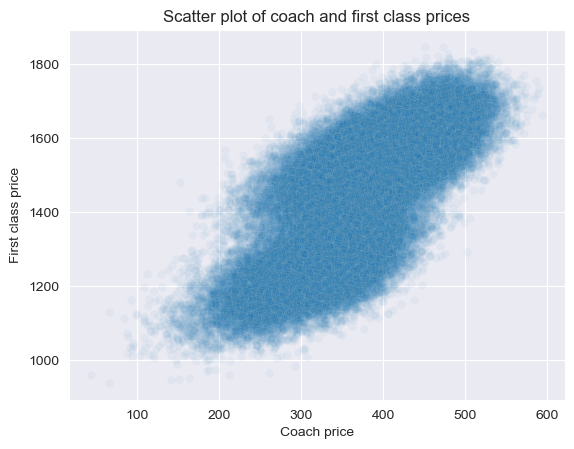

In [187]:
sns.scatterplot(data = df, x='coach_price', y='firstclass_price',  alpha = 0.05)
plt.xlabel("Coach price")
plt.ylabel("First class price")
plt.title("Scatter plot of coach and first class prices")

Seems like the relation between these two variables isn't linear. Points aren't only focused close to the straight line - they are forming a curve.
Let's use locally weighted linear regression (LOWESS) to find curve that fits the best.

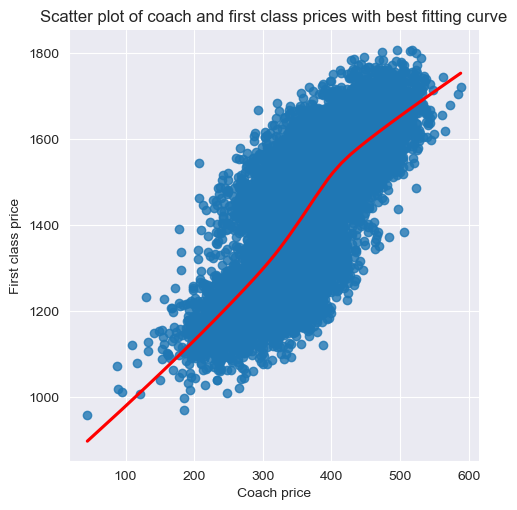

In [188]:
perc = 0.1
flight_sub = df.sample(n = int(df.shape[0]*perc))

sns.lmplot(x = "coach_price", y = "firstclass_price", data = flight_sub, line_kws={'color': 'red'}, lowess=True)
plt.xlabel("Coach price")
plt.ylabel("First class price")
plt.title('Scatter plot of coach and first class prices with best fitting curve')
plt.show()

Let's modify our last plot to present information if particular prices corresponds to flight on weekend or not. 

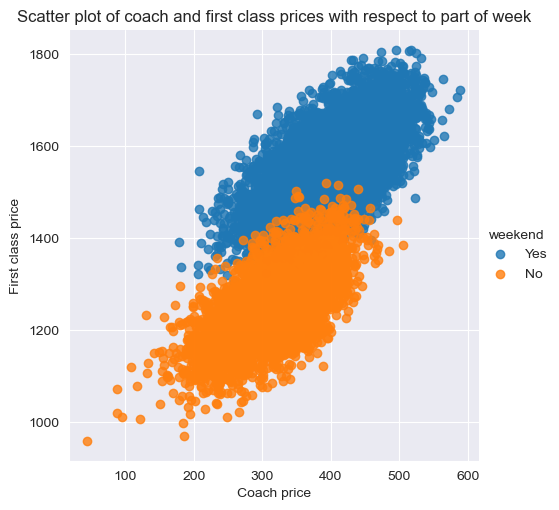

In [189]:
sns.lmplot(x = 'coach_price', y = 'firstclass_price', hue = 'weekend', data = flight_sub, fit_reg=False)
plt.xlabel("Coach price")
plt.ylabel("First class price")
plt.title("Scatter plot of coach and first class prices with respect to part of week")
plt.show()

Last graph present how the length of flight affect the number of passengers 

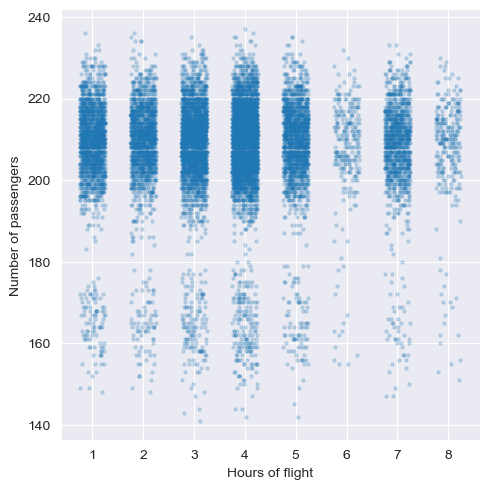

In [190]:
sns.lmplot(x = "hours", y = "passengers", data = flight_sub, x_jitter = 0.25, scatter_kws={"s": 5, "alpha":0.2}, fit_reg = False)
plt.xlabel("Hours of flight")
plt.ylabel("Number of passengers")
plt.show()

## PCA - dimensionality reduction

Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.

One of the things we need to do before implementing them is encoding categorical variables.

In [191]:
df_encoded = pd.get_dummies(df, columns=['inflight_meal', 'inflight_entertainment', 'inflight_wifi', 'day_of_week', 'redeye', 'weekend'])

Next we need to normalize our dataset so that every variable is on the same scale.

In [192]:
from sklearn.preprocessing import MinMaxScaler
scaler  = MinMaxScaler()
df_scaled= scaler.fit_transform(df_encoded)

In [193]:
df_scaled = pd.DataFrame(df_scaled, columns=df_encoded.columns)

PCA comes from sklearn package co we need to import them.

In [194]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit_transform(df_scaled)

array([[-5.60872233e-01, -4.17104612e-01, -2.68730706e-01, ...,
        -3.44709645e-16, -6.21671757e-17,  2.63751688e-16],
       [-6.14310347e-01, -4.07798271e-01, -3.04924435e-01, ...,
         1.59781118e-15,  6.70933867e-16,  1.95675782e-16],
       [-4.66446355e-01, -4.19674216e-01, -2.37172209e-01, ...,
         1.93331276e-16, -8.10147741e-17, -1.52902970e-16],
       ...,
       [-4.95315067e-01, -4.13332817e-01, -2.63439788e-01, ...,
        -2.11882028e-17, -5.19433994e-17, -3.90971912e-17],
       [-6.64125739e-01, -4.08106638e-01, -2.94516398e-01, ...,
         3.86237314e-18, -1.50019928e-17, -4.52299266e-17],
       [-6.81882729e-01, -4.07315156e-01, -2.97802542e-01, ...,
         2.20477413e-17, -1.18010454e-17,  4.34575294e-19]])

Let's see how many percent of whole dataset variance is explained by each variable.

In [195]:
var_ratio = pd.DataFrame(pca.explained_variance_ratio_).transpose()
var_ratio.columns = list(pca.feature_names_in_)
var_ratio

,miles,passengers,delay,coach_price,firstclass_price,hours,inflight_meal_No,inflight_meal_Yes,inflight_entertainment_No,inflight_entertainment_Yes,...,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday,redeye_No,redeye_Yes,weekend_No,weekend_Yes
0,0.253237,0.171266,0.130919,0.097317,0.077061,0.07414,0.044165,0.042257,0.040997,0.035453,...,0.000939,0.000295,0.000292,5.323328e-33,4.600270e-33,2.720506e-33,1.642657e-33,1.391278e-33,9.454856e-34,4.800218e-34


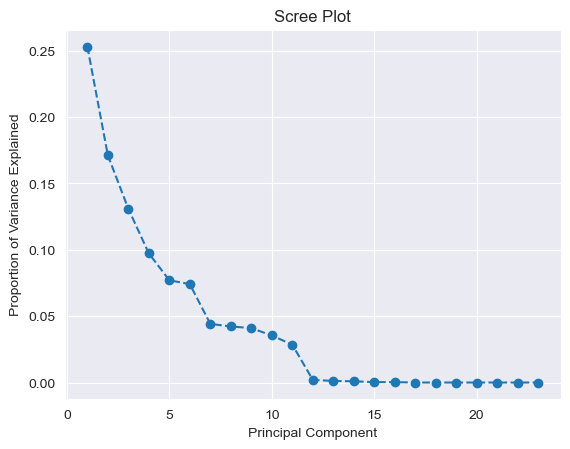

In [196]:
plt.plot(np.arange(pca.n_components_) + 1, pca.explained_variance_ratio_,marker = 'o', linestyle = '--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

How many features we need to choose to explain about 95% of variance? Let's take a look at this plot.

Text(0, 0.5, 'Cumulative Explained Variance')

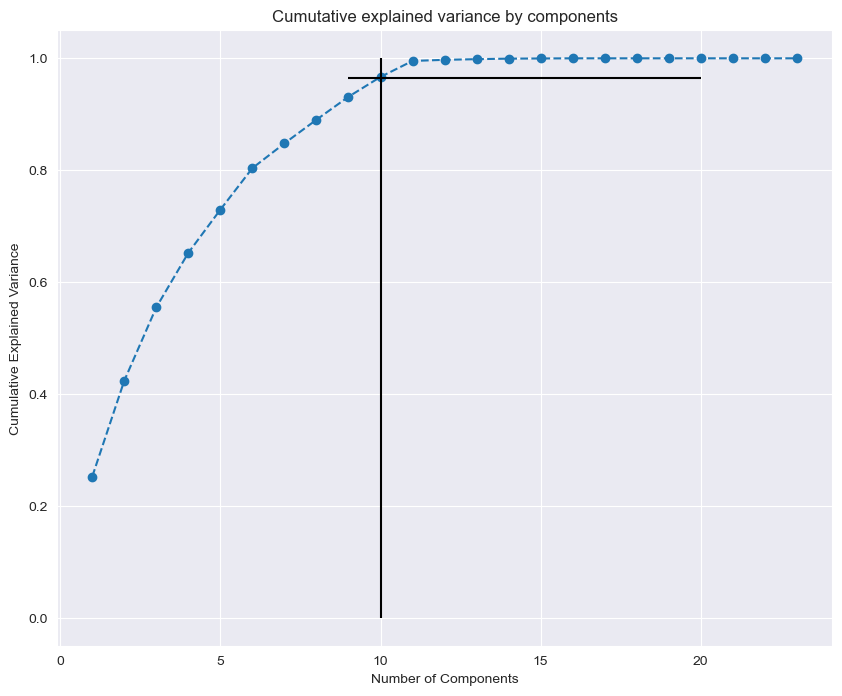

In [199]:
plt.figure (figsize = (10,8))
plt.plot(range(1,24), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.hlines(y=.965, xmin=9, xmax=20, colors = "black")
plt.vlines(x=10, ymin=0, ymax=1, colors = "black")
plt.title('Cumutative explained variance by components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

We need 10 features. Here are their names.

In [198]:
list(pca.feature_names_in_)[:10]

['miles',
 'passengers',
 'delay',
 'coach_price',
 'firstclass_price',
 'hours',
 'inflight_meal_No',
 'inflight_meal_Yes',
 'inflight_entertainment_No',
 'inflight_entertainment_Yes']

At this stage we are ready to implement ML/DL algorithms.